In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')
df = pd.read_csv("fulltimeNY.csv")
df['numreview'] = df['numreview'].fillna(0) #replace null values with 0.
df.head()
df = df.dropna(axis=0, how = 'any') #remove rows with all null values
sum(df.isnull().any(axis=1)) # check if the removal is successful
newlocation = [str(row).rstrip() for row in df['location']]
newlocation = [re.sub('[\s*]+[\d]+[\d]+[\d]+[\d]+[\d]','',row) for row in newlocation]
df['newlocation'] = pd.Series(newlocation,index = df.index)
df_loc = pd.DataFrame(df['newlocation'].unique())
df_loc.to_csv("location_cities_NY.csv")
df['newlocation'].unique() # SpotCheck Content


array(['New York, NY', 'Jersey City, NJ', 'Manhattan, NY', 'Newark, NJ',
       'Oakland, NJ', 'Bronx, NY', 'Hoboken, NJ', 'Brooklyn, NY',
       'Rutherford, NJ', 'Union, NJ', 'Rahway, NJ', 'Murray Hill, NJ',
       'South Plainfield, NJ', 'Queens, NY', 'Little Falls, NJ',
       'Florham Park, NJ', 'Troy Hills, NJ', 'Bloomfield, NJ',
       'Lynbrook, NY', 'Allendale, NJ', 'Parsippany, NJ',
       'West Orange, NJ', 'Kenilworth, NJ', 'Ridgefield, NJ',
       'Harrison, NY', 'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ',
       'Orangeburg, NY', 'Fairfield, NJ', 'Palisades, NY',
       'Hackensack, NJ', 'Roseland, NJ', 'East Hanover, NJ',
       'Long Beach, NY', 'Whippany, NJ', 'Manhasset, NY', 'Yonkers, NY',
       'New Hyde Park, NY', 'Secaucus, NJ', 'Port Washington, NY',
       'Staten Island, NY', 'Short Hills, NJ', 'Manhattanville, NY',
       'Woodcliff Lake, NJ'], dtype=object)

In [2]:
city = [re.split(',',row)[0] for row in df['newlocation']]
state = [re.split(',',row)[1] for row in df['newlocation']]
state = map(lambda x: x.strip(),state)
df['city'] = pd.Series(city,index = df.index)
df['state'] = pd.Series(state,index = df.index)

In [3]:
df['description'] = df['description'].apply(lambda x: re.sub('[^\w\s]','', x))

In [4]:
df.to_csv('cleandata.csv') #Description data cleaned

The Following Code Was used for all of the categories outlilned in the Data Clean Up the following:

- Position Column, Skill Set, Tools, Locations

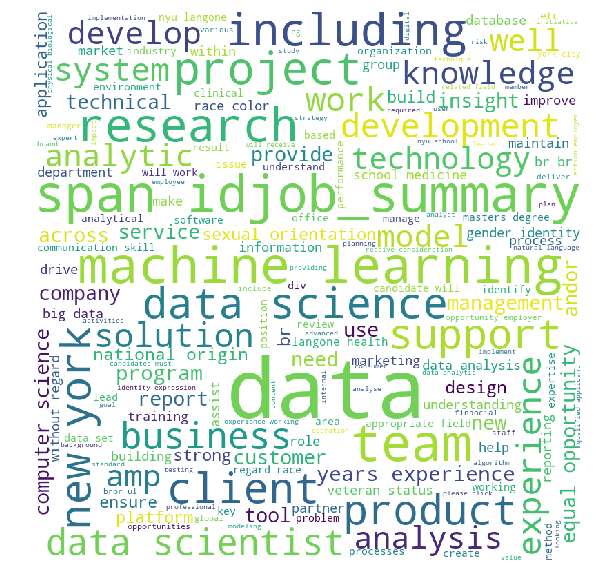

In [5]:
## importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
df = pd.read_csv("cleandata.csv", header=0) 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.description:   #position/company/description/reviews/location

      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words= comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [10]:
# Put all string together
all_job_description = ""
for job in df['description']:
    all_job_description += " " + job

In [11]:
from nltk.tokenize import word_tokenize
all_job_description_l = all_job_description.lower()
tokens = word_tokenize(str(all_job_description_l))
len(tokens)

535455

In [12]:
filtered_description = []
for word in tokens:
    if word not in list(stop_words):
        filtered_description += [word]

NameError: name 'stop_words' is not defined

In [ ]:
import pandas as pd

filtered_description_string = ""
for token in filtered_description:
    filtered_description_string += ' ' + token
#df_desc = pd.DataFrame(filtered_description_string))